[10 PyTorch tutorial - What is LeNet 5 and how to implement it in PyTorch](https://www.youtube.com/watch?v=HPXnJmO8yQ4)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn, optim
from torchvision import datasets, transforms
import torch.nn.functional as F

In [2]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
device

'cuda'

In [3]:
transform = transforms.Compose([
                                transforms.Resize((32,32)),
                                transforms.ToTensor()
])

train_set = datasets.FashionMNIST('DATA_MNIST/',download=True, train= True,transform=transform)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle= True)

test_set = datasets.FashionMNIST('DATA_MNIST/',download=True, train= False,transform=transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle= True)

train_data_size = len(train_set)
test_data_size = len(test_set)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting DATA_MNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to DATA_MNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting DATA_MNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to DATA_MNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting DATA_MNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to DATA_MNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting DATA_MNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to DATA_MNIST/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
training_data = enumerate(trainloader)
batch_idx, (images, labels) = next(training_data)
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 32, 32])
torch.Size([64])


In [9]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.convolutional_layer = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2, padding=0),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh(),
        )
        self.linear_layer = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10),
        )
    def forward(self, x):
        x = self.convolutional_layer(x)
        x = torch.flatten(x,1)
        x = self.linear_layer(x)

        x= F.softmax(x, dim=1)
        return x

In [15]:
model = LeNet5().to(device)
print(model)

LeNet5(
  (convolutional_layer): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
  )
  (linear_layer): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [16]:
optimizer = optim.Adam(model.parameters(), lr= 0.01)
criterion = nn.CrossEntropyLoss()

In [21]:
repochs = 20
train_loss , val_loss = [],[]

for epoch in range(epochs):
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    for idx, (image, label) in enumerate(trainloader):
        image,label = image.to(device), label.to(device)

        optimizer.zero_grad()
        pred = model(image)
        
        loss = criterion(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

    total_train_loss = total_train_loss / (idx+1)
    train_loss.append(total_train_loss)

    model.eval()
    total = 0

    # validataion
    for idx, (image, label) in enumerate(testloader):
        image,label = image.to(device), label.to(device)
        pred = model(image)

        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total += 1
        
    accuracy = total /test_data_size

    total_val_loss = total_val_loss / (idx+1)
    val_loss.append(total_val_loss)

    print(f"Epoch: {epoch} | Train loss;{total_train_loss} | validation loss: {total_val_loss} | accuracy : {accuracy}")

Epoch: 0 | Train loss;1.7159787449501216 | validation loss: 1.7249175636631668 | accuracy : 0.7355
Epoch: 1 | Train loss;1.7208800082013551 | validation loss: 1.717682807308853 | accuracy : 0.7422
Epoch: 2 | Train loss;1.717432968906248 | validation loss: 1.8079156313732172 | accuracy : 0.6536
Epoch: 3 | Train loss;1.7176426522004833 | validation loss: 1.7162444090387623 | accuracy : 0.7445
Epoch: 4 | Train loss;1.7173557501357755 | validation loss: 1.7296635854016444 | accuracy : 0.7307
Epoch: 5 | Train loss;1.7179367200397988 | validation loss: 1.7422609967031297 | accuracy : 0.7183
Epoch: 6 | Train loss;1.7178433627716259 | validation loss: 1.7272481569059335 | accuracy : 0.7329
Epoch: 7 | Train loss;1.7141312852597186 | validation loss: 1.7257664598477114 | accuracy : 0.7327
Epoch: 8 | Train loss;1.7230950173284454 | validation loss: 1.7303091895048786 | accuracy : 0.729
Epoch: 9 | Train loss;1.74129863118312 | validation loss: 1.7819601168298418 | accuracy : 0.6777
Epoch: 10 | Tra

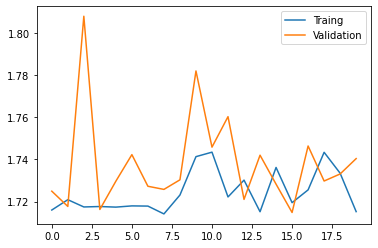

In [22]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['Traing', 'Validation'])

In [23]:
testiter = iter(testloader)
images, labels = testiter.next()

In [26]:
with torch.no_grad():
    images, labels = images.to(device) , labels.to(device)
    pred = model(images)

In [41]:
images_np = [i.mean(dim=0).cpu().numpy() for i in images]

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [37]:
pred.shape

torch.Size([64, 10])

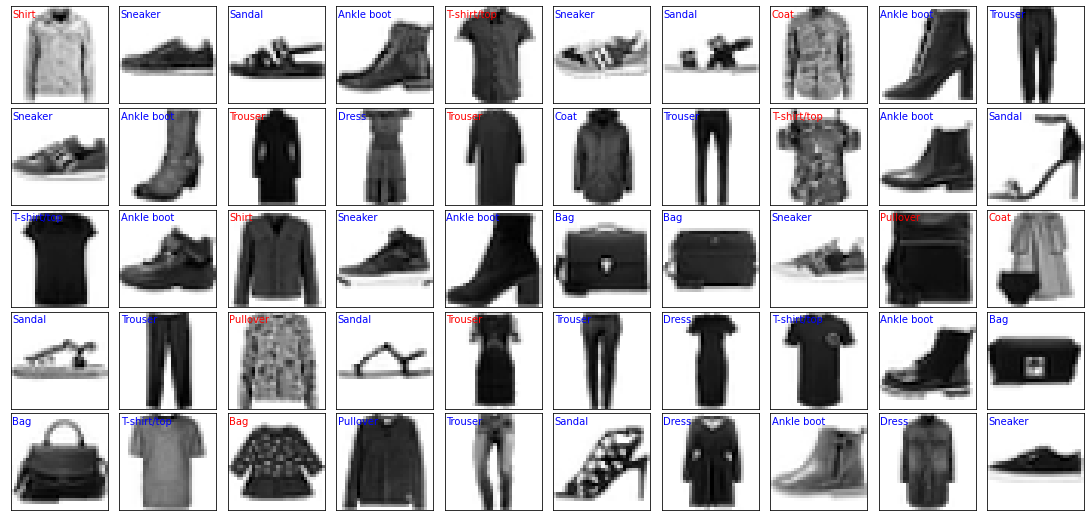

In [43]:
fig = plt.figure(figsize=(15,7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(50):
    ax = fig.add_subplot(5,10,i+1, xticks=[], yticks=[])
    ax.imshow(images_np[i], cmap=plt.cm.gray_r, interpolation='nearest')

    if labels[i] == torch.max(pred[i],0)[1]:
        ax.text(0,3, class_names[torch.max(pred[i],0)[1]], color='blue')
    else:
        ax.text(0,3, class_names[torch.max(pred[i],0)[1]], color='red')